# Feature Selection Comparisons

## Description

In this problem we will work with the diabetes dataset from sklearn. This data set is for a regression problem where 10 features are used to predict the progression of diabetes. The dataset is described in more detail [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). We will use multiple techniques of feature selection to try to interpret the strength of the features in the dataset. The following techniques are below: 

- Pearson correlation coefficient using r_regression from sklearn (univariate feature selection)
- Mutual information using mutual_info_regression from sklearn (univariate feature selection)
- Random forest feature importance using RandomForestRegressor from sklearn (multivariate feature selection)
- Recursive feature elimination using sklearn.feature.selection.RFE with a Support Vector Regressor SVR (multivariate feature selection)

Questions to Explore:

* Are there 3 features that are selected in the top 5 by all 4 methods? 
* If so, what are they? 
* If not, what are the 3 features that are selected by the most methods? 
* How would it be possible that univariate methods might select different features than multivariate methods? 
* How does dependence between features affect the feature selection methods?

In [1]:
# Some imports you will need
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import corrcoef
import seaborn as sns
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Plotting Function & Printing Function

In [2]:
#function for plotting importance
def plot_importance(importance_arr,feature_names,title,ylabel,descending=True):
    #figure and axis 
    fix, ax = plt.subplots()
    #array of indices to sort by absolute value in descending order by default 
    sorted_indices = np.argsort(np.abs(importance_arr))[::-1*(2*descending-1)]
    #rank
    rank = np.arange(len(feature_names))
    #bar plotting
    ax.bar(rank,importance_arr[sorted_indices])
    #setting xticks to feature name 
    plt.xticks(ticks = rank, labels = np.array(feature_names)[sorted_indices])
    #plot title,labels 
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel(ylabel)
    return ax

In [3]:
#function for printing the top 5 features
def print_top5(importance_arr, feature_names,title,descending=True):
    #array of indices to sort by the abs value in descending order by default 
    sorted_indices = np.argsort(np.abs(importance_arr))[::-1*(2*descending-1)]
    #round the results in the importance array 
    importance_arr = np.round(importance_arr,3)
    #print defined title 
    print(title)
    #print the top 5 features 
    for i,ind in enumerate(sorted_indices):
        print(feature_names[ind]+" : "+str(importance_arr[ind]))
        if i == 4:
            break

## Loading and preparing the data

In [4]:
# Load the diabetes data set as X, y
X, y = load_diabetes(return_X_y=True)
# Load the diabetes data set as data to read the description
data = load_diabetes()

In [5]:
# Print out the DESCR attribute to inpect the variables
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
# Print the array of feature names
print(data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [7]:
#seed
seed = 999
# Split the Data into train/testing sets
X_train, X_test, y_train, y_test = train_test_split(data['data'],data['target'],random_state = seed)

In [8]:
# Check the shapes
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('\ny_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (331, 10)
X_test:  (111, 10)

y_train:  (331,)
y_test:  (111,)


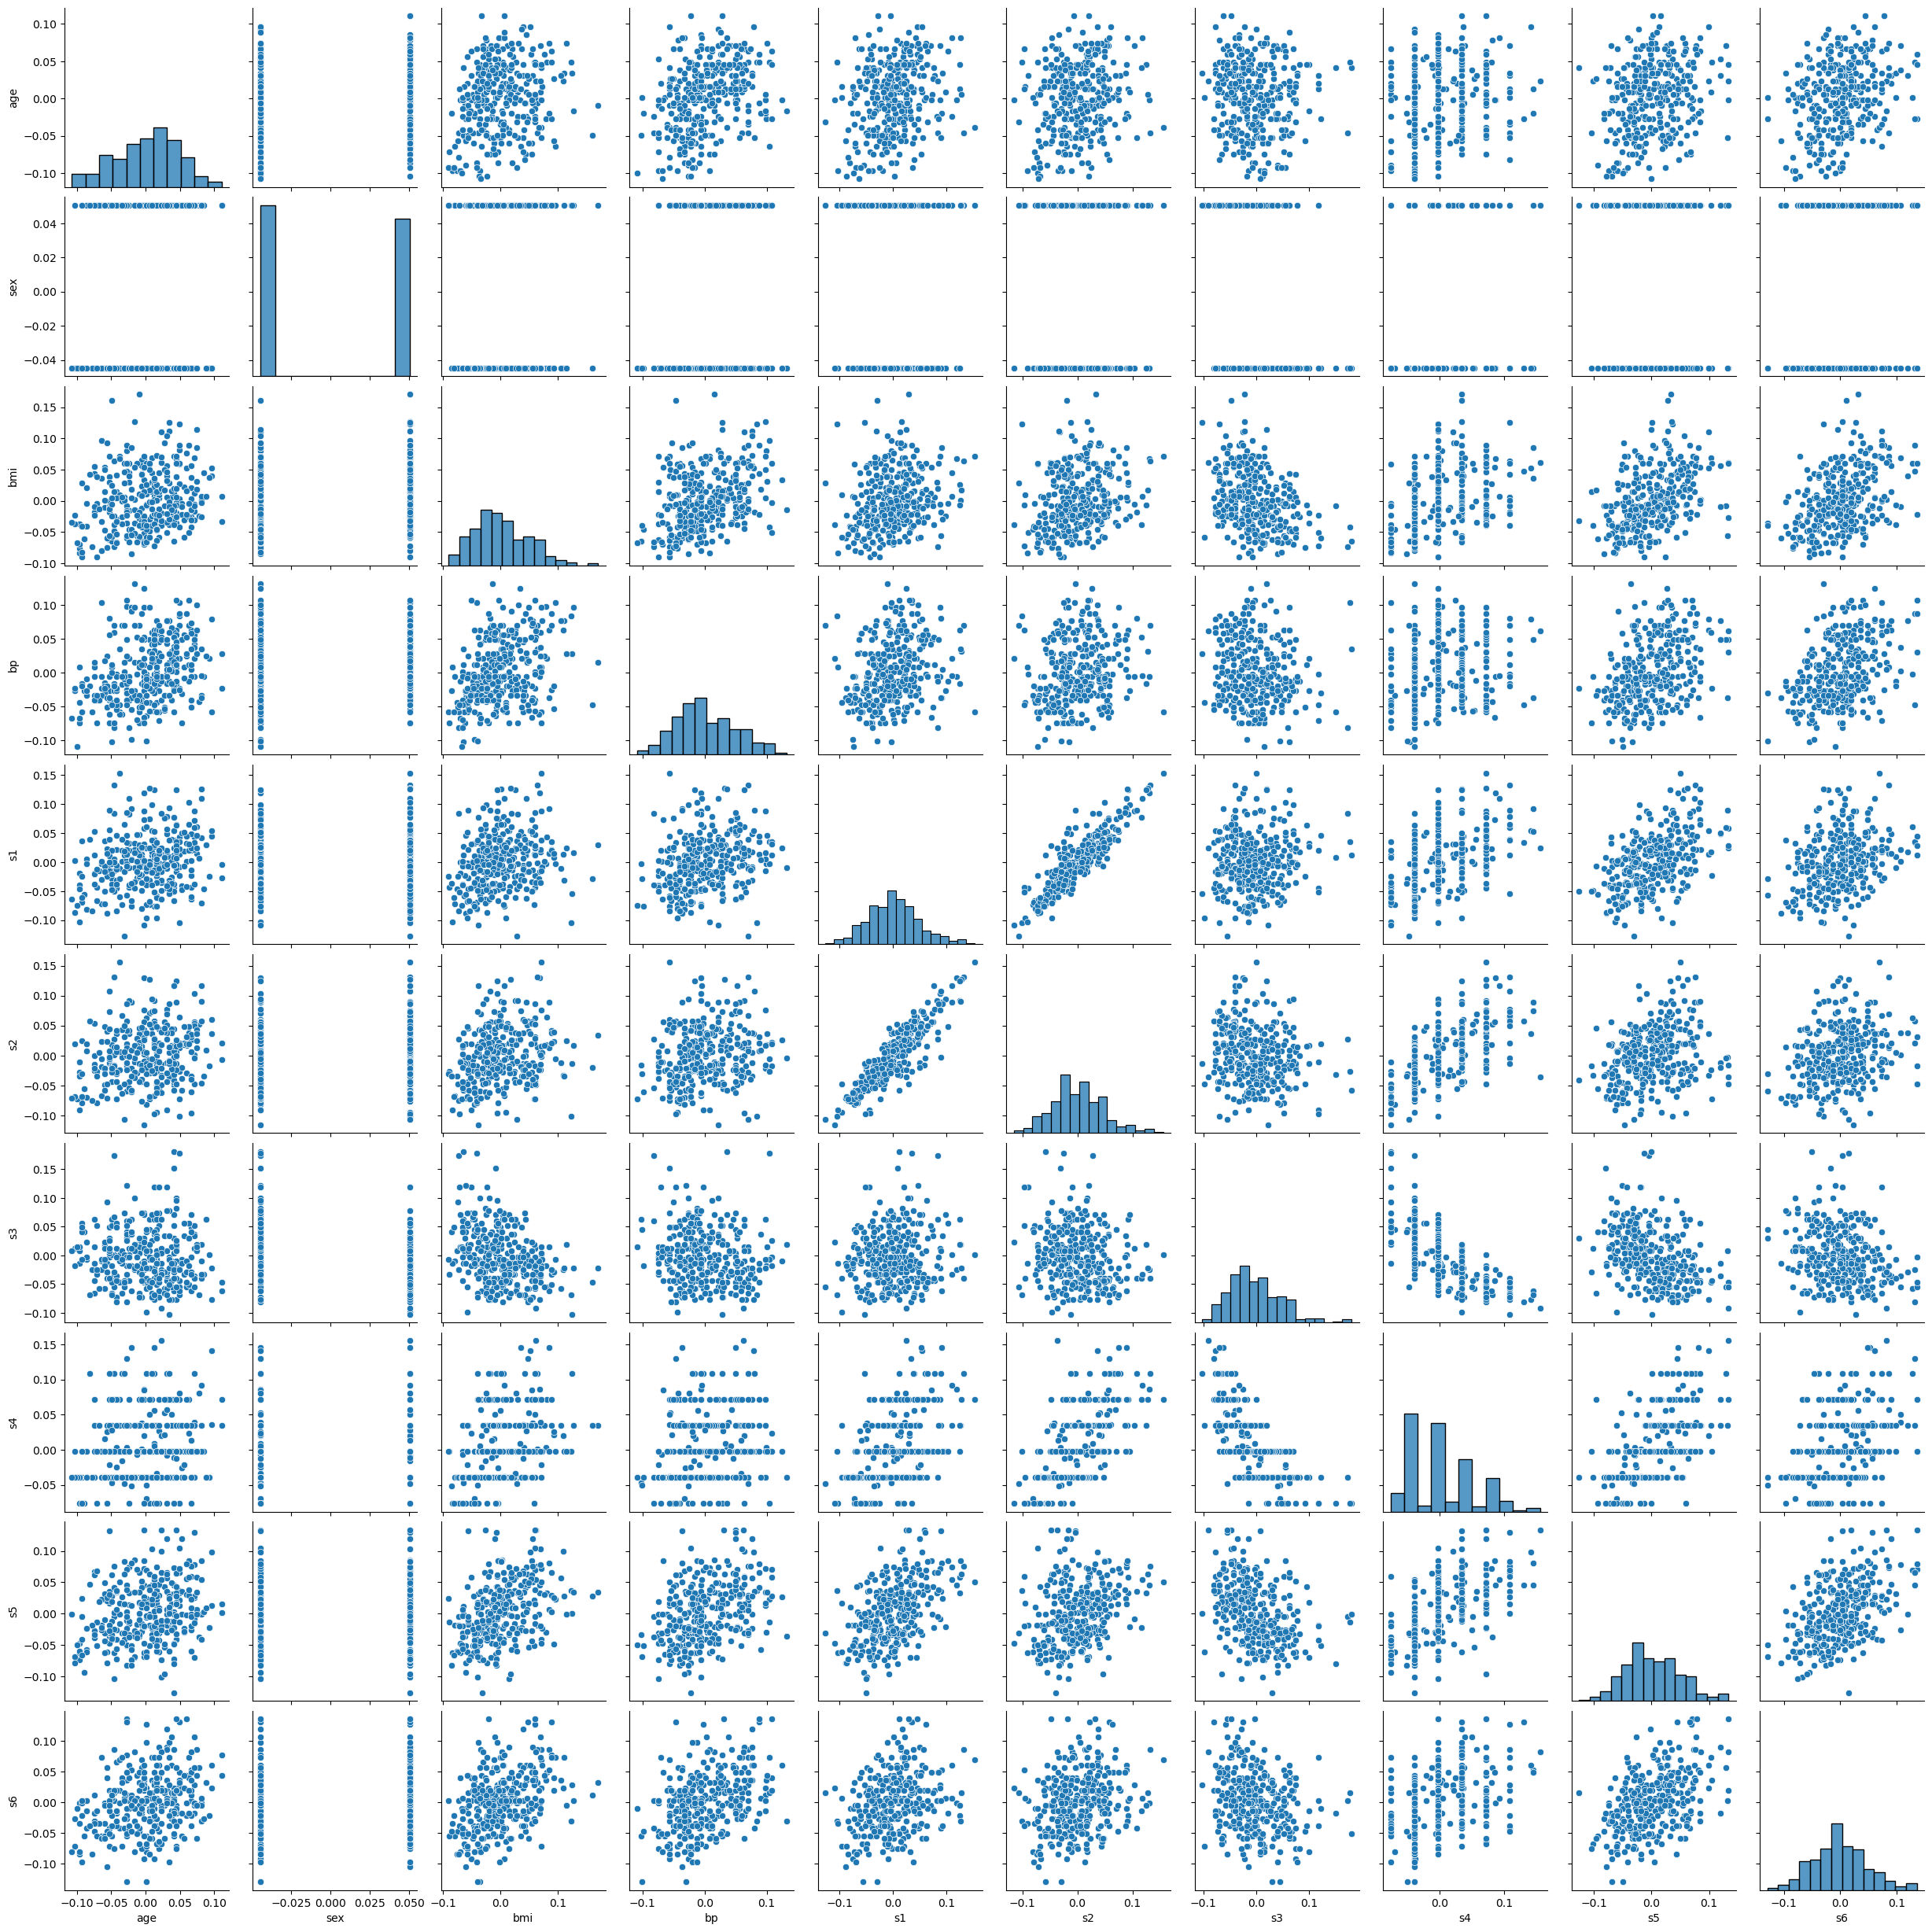

In [9]:
# create pandas dataframe for seaborn pairplot 
df = pd.DataFrame(X_train, columns = data.feature_names)

#pairplot 
sns.pairplot(df);

Q: What does the EDA tell you about the data?

A: Observations:
* The s1 and s2 attributes are highly correlated, as seen in the pairplot. This indicates that one of these features can be dropped, since they both encode the same information. Additionally, using features in modeling that are highly correlated may cause bias / double counting towards the highly correlated features. 
* The s5 and s6 attributes have a relatively high correlation, which may indicate that one of these features could be dropped; however, more analysis is needed to determine this fact. 
* The other features do not show strong correlations, so we cannot immediately conclude that they should be removed. 
* The sex and s4 attributes are quantized, while the others have continous distributions with slight skews.

## Univariate feature selection with r_regression

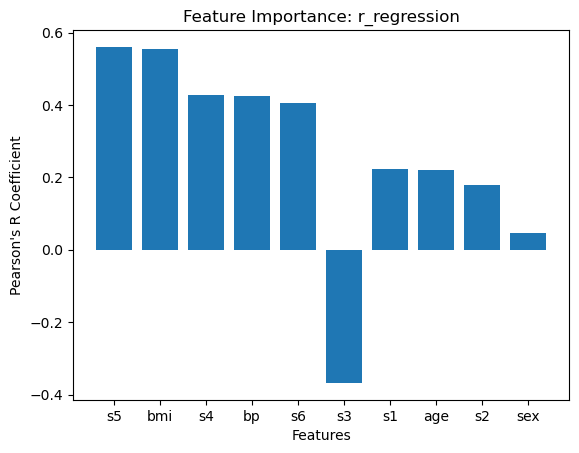

In [10]:
# Use r_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
r_reg = r_regression(X_train, y_train)
plot_importance(r_reg, data.feature_names,
                'Feature Importance: r_regression','Pearson\'s R Coefficient');

In [11]:
# print the top 5 features according to r_regression?
print_top5(r_reg,data.feature_names,'Top 5 Features : r_regression\n\nFeature : R Coefficient')

Top 5 Features : r_regression

Feature : R Coefficient
s5 : 0.561
bmi : 0.556
s4 : 0.428
bp : 0.425
s6 : 0.405


## Univariate feature selection with mutual information using mutual_info_regression

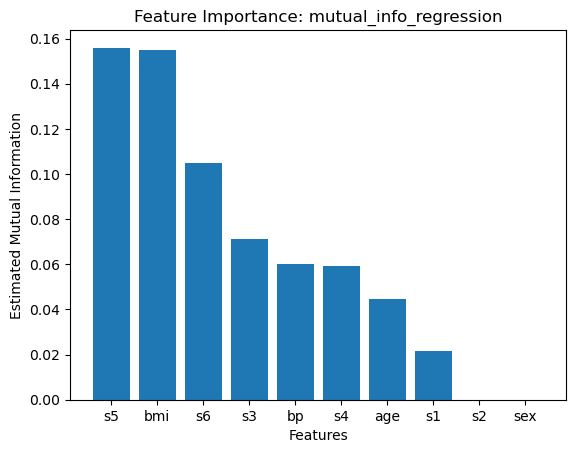

In [12]:
# Use mutual_info_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
mutual_info_reg = mutual_info_regression(X_train, y_train, random_state=seed)
plot_importance(mutual_info_reg, data.feature_names,
                'Feature Importance: mutual_info_regression',
                'Estimated Mutual Information');

In [13]:
# What are the top 5 features according to mutual_info_regression?
print_top5(mutual_info_reg,data.feature_names,
           'Top 5 Features : mutual_info_regression\n\nFeature : Mutual Info')

Top 5 Features : mutual_info_regression

Feature : Mutual Info
s5 : 0.156
bmi : 0.155
s6 : 0.105
s3 : 0.071
bp : 0.06


## Multivariate feature selection with Random Forest feature_importance_

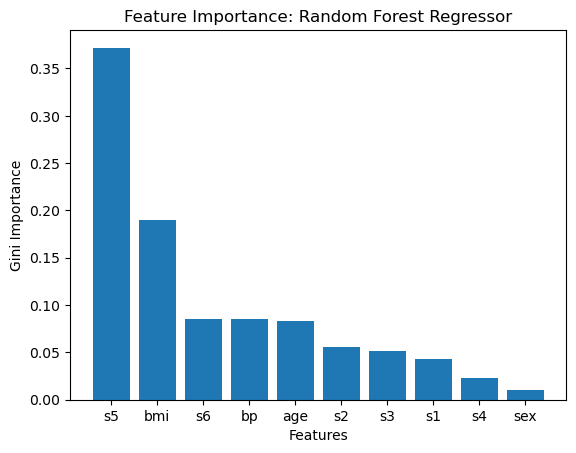

In [14]:
# Use random forest feature_importance_ to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
RF_reg = RandomForestRegressor(random_state=seed).fit(X_train, y_train)
plot_importance(RF_reg.feature_importances_, data.feature_names,
                'Feature Importance: Random Forest Regressor',
                'Gini Importance');

In [15]:
# What are the top 5 features according to random forest feature_importance_?
print_top5(RF_reg.feature_importances_,data.feature_names,
           'Top 5 Features : Random Forest Regressor\n\nFeature : Gini Importance')

Top 5 Features : Random Forest Regressor

Feature : Gini Importance
s5 : 0.372
bmi : 0.19
s6 : 0.086
bp : 0.085
age : 0.083


## Multivariate feature selection with recursive feature elimination (RFE) using a support vector regressor

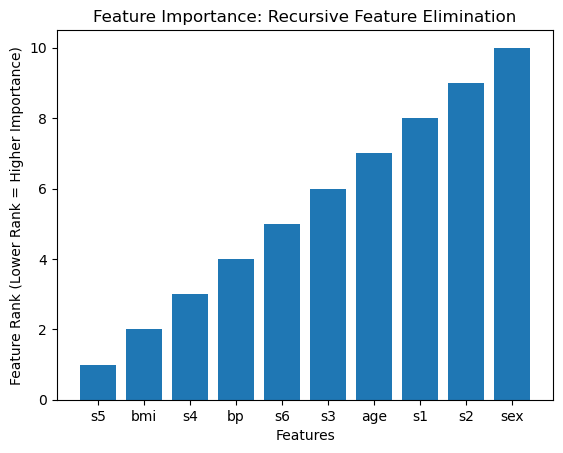

In [16]:
# Use recursive feature elimination (RFE) with a support vector regressor 
# to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
estimator = SVR(kernel='linear')
rfe = RFE(estimator, n_features_to_select=1).fit(X_train,y_train)
plot_importance(rfe.ranking_, data.feature_names,
                'Feature Importance: Recursive Feature Elimination',
                'Feature Rank (Lower Rank = Higher Importance)',descending=False);

In [17]:
# What are the top 5 features according to RFE with SVR?
print_top5(rfe.ranking_,data.feature_names,
           'Top 5 Features : RFE with SVR\n\nFeature : Ranking',descending=False)

Top 5 Features : RFE with SVR

Feature : Ranking
s5 : 1
bmi : 2
s4 : 3
bp : 4
s6 : 5


## Conclusions

Q1: Are there 3 features that are selected in the top 5 by all 4 methods?

A1: Yes.

Q2: If so, what are they? / If not, what are the 3 features that are selected by the most methods? 

A2:  The features that are selected in the top 5 by all 4 feature selection methods are  S5, bmi, bp, and s6. 

Q3: How would it be possible that univariate methods might select different features than multivariate methods?

A3: Univariate methods might select different features than multivariate methods due to the difference in how they determine feature importance. Univariate methods will analyze one attribute at a time to determine importance. In contrast, multivariate will consider multiple attributes at the same time to determine importance, thus being able to capture if features together contribute meaningful information to the regression problem.  

Q4: How does dependence between features affect the feature selection methods?

Q4: Features that are highly dependent on each other will provide similar information to the regression problem, and thus return similar feature imporance in selection methods. For example, from the pairplot analysis, it is observed that s1 and s2 are highly correlated. In the four feature selection methods above, they are always ranked similarly in terms of importance. 